# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
# pip installed citipy in command line
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | tangalle
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | tripoli
Processing Record 13 of Set 1 | sao joao da barra
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | paulden
Processing Record 20 of Set 1 | adjumani
Processing Record 21 of Set 1 | seogwipo
City not found. Skip

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [18]:
# Display sample data
city_data_df.head()
# Convert datetime to readable date format (looked up how to change on stackoverflow)
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.93,96,97,10.71,TF,2023-12-13
1,puerto natales,-51.7236,-72.4875,10.25,43,40,13.38,CL,2023-12-13
2,atafu village,-8.5421,-172.5159,26.31,91,100,6.10,TK,2023-12-13
3,badger,64.8000,-147.5333,-14.07,84,100,2.57,US,2023-12-13
4,alice springs,-23.7000,133.8833,26.75,32,16,2.57,AU,2023-12-13


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_files/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_files/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.93,96,97,10.71,TF,2023-12-13
1,puerto natales,-51.7236,-72.4875,10.25,43,40,13.38,CL,2023-12-13
2,atafu village,-8.5421,-172.5159,26.31,91,100,6.10,TK,2023-12-13
3,badger,64.8000,-147.5333,-14.07,84,100,2.57,US,2023-12-13
4,alice springs,-23.7000,133.8833,26.75,32,16,2.57,AU,2023-12-13


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

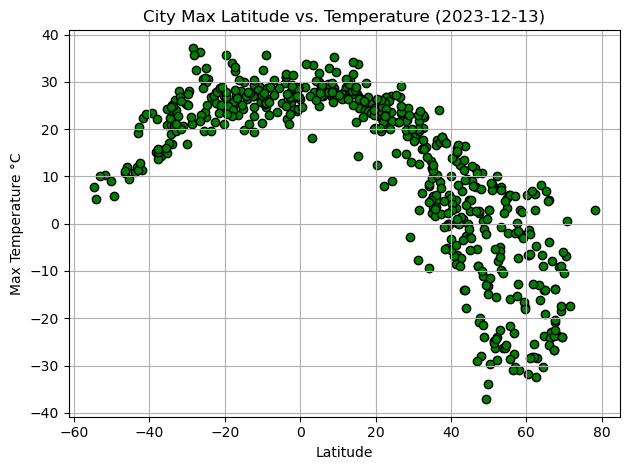

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='g', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_files/fig1_Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

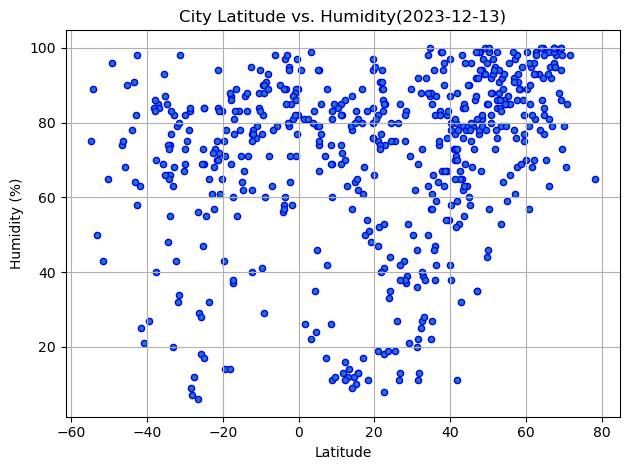

In [34]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='b', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Humidity({date})")
# Save the figure
plt.savefig("output_files/Fig2_Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

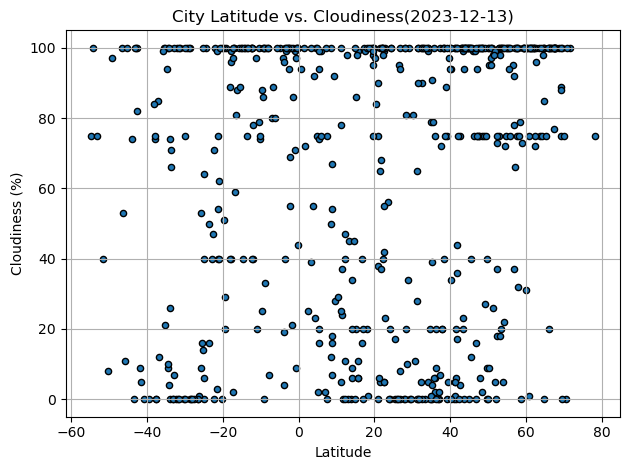

In [36]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='black', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Cloudiness({date})")

# Save the figure
plt.savefig("output_files/Fig3_Lat_vs_Clouds.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

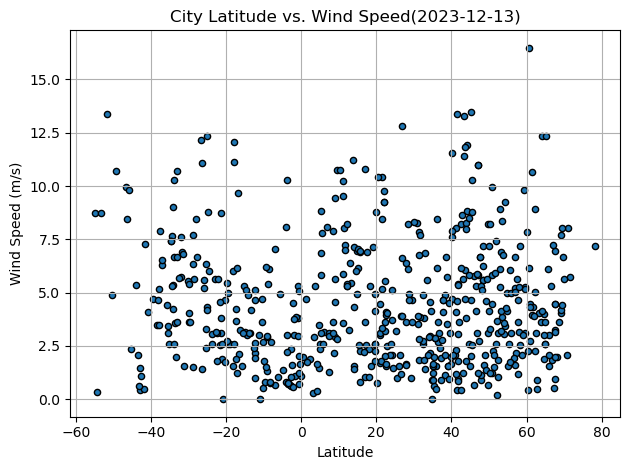

In [37]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Wind Speed({date})")

# Save the figure
plt.savefig("output_files/Fig4_Lat_vs_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def linreg_func(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_eq,(10,10),fontsize=8,color="red")
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_files/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,badger,64.8000,-147.5333,-14.07,84,100,2.57,US,2023-12-13
6,tangalle,6.0240,80.7911,27.09,85,99,3.14,LK,2023-12-13
7,lompoc,34.6391,-120.4579,13.21,87,20,4.12,US,2023-12-13
9,haiku-pauwela,20.9219,-156.3051,22.80,75,0,4.47,US,2023-12-13
10,tripoli,32.8752,13.1875,22.51,39,100,6.86,LY,2023-12-13


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.93,96,97,10.71,TF,2023-12-13
1,puerto natales,-51.7236,-72.4875,10.25,43,40,13.38,CL,2023-12-13
2,atafu village,-8.5421,-172.5159,26.31,91,100,6.10,TK,2023-12-13
4,alice springs,-23.7000,133.8833,26.75,32,16,2.57,AU,2023-12-13
5,avarua,-21.2078,-159.7750,25.03,94,40,3.09,CK,2023-12-13


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.81x + 37.27
The r-value is: -0.8380441251920119


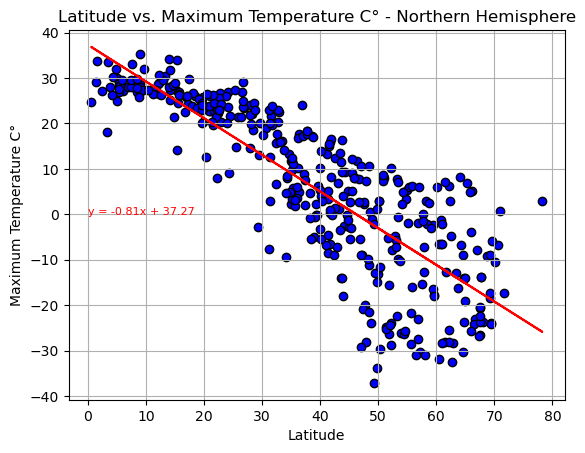

In [86]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NHemi_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
linreg_func(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.29x + 30.38
The r-value is: 0.6559720782584069


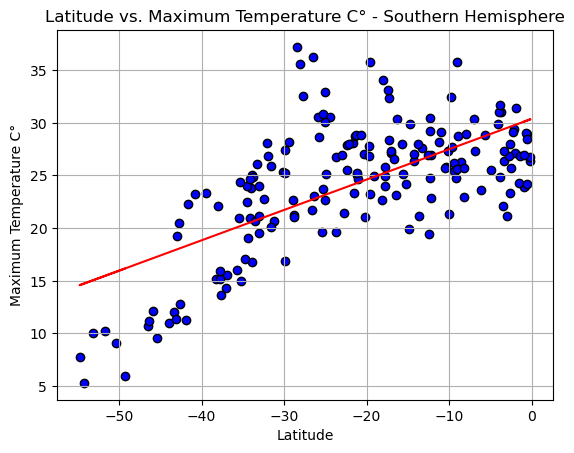

In [89]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Southern Hemisphere")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SHemi_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
linreg_func(x,y,name,vbl,hemi)

plt.show()

**Discussion about the linear relationship:** 
There is a strong negative correlation between latitude and maximum temperature in the Northern hemisphere and a lower strength positive correlation between latitude and maximum temperature in the Southern Hemisphere. This shows that maximum temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.55x + 50.5
The r-value is: 0.4257161552646309


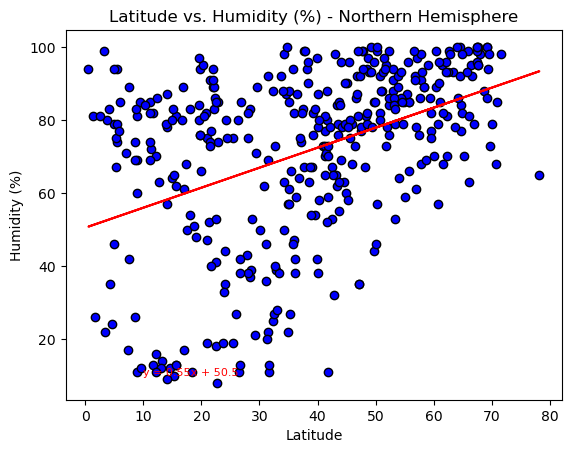

In [98]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity({date})")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NHemi_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
linreg_func(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.34x + 76.99
The r-value is: 0.22385083035698833


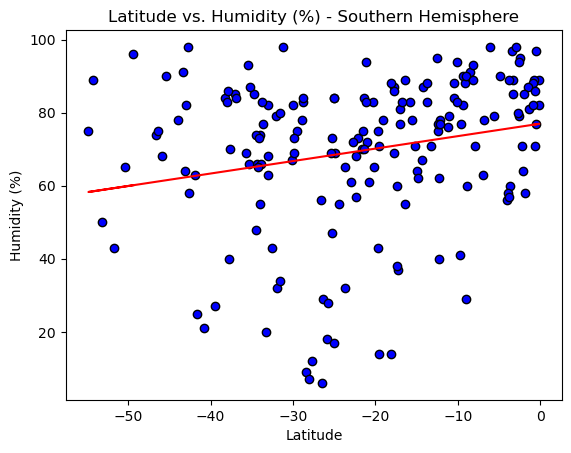

In [91]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity({date})")

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SHemi_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
linreg_func(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 
There is not a statistically significant correlation between latitude and humidity across the Northern and Southern Hemispheres.The linear equations for both hemispheres indicate a slightly positive correlation, suggesting that proximity to the equator does not significantly affect humidity. Ultimately, the scatter points illustrate that the data is too widely dispersed to establish a dependable correlation between latitude and humidity between hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.61x + 39.53
The r-value is: 0.2796838317417318


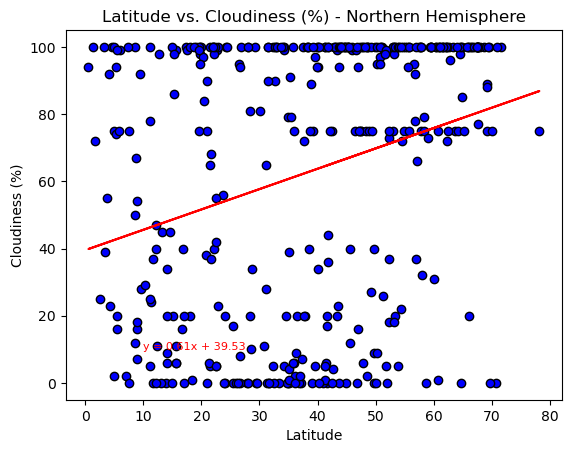

In [92]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness({date})")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NHemi_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
linreg_func(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.78x + 79.3
The r-value is: 0.2723233516042057


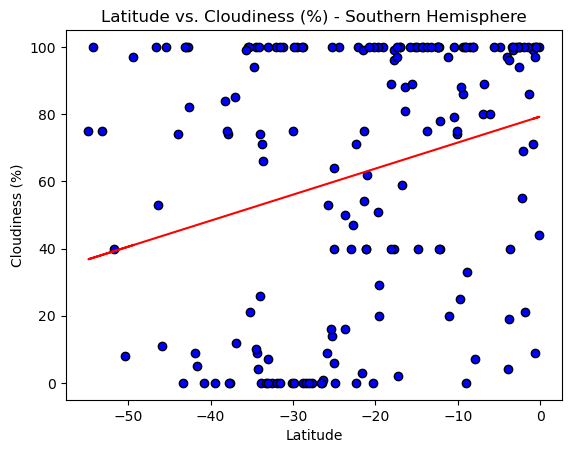

In [97]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness({date})")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SHemi_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
linreg_func(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 
The available data suggests a minimal or nonexistent connection between latitude and cloudiness. Despite the positive correlation indicated by the linear equations for each hemisphere, these figures imply that proximity to the equator does not influence cloudiness significantly. The dispersion of scatter points underscores that the data is too widely distributed to establish a dependable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.0x + 4.39
The r-value is: 0.014894776951252943


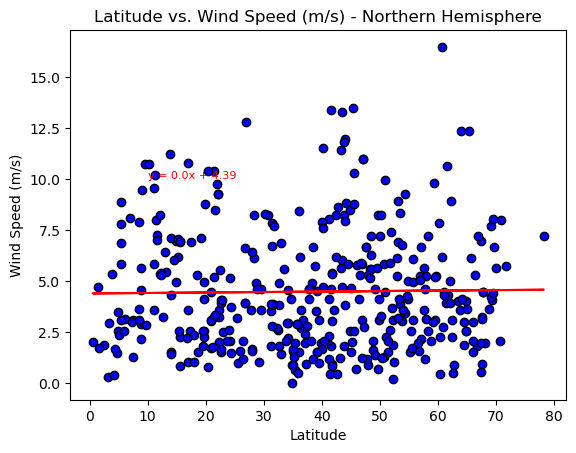

In [95]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed({date})")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NHemi_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
linreg_func(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.08x + 2.49
The r-value is: -0.38864937039169783


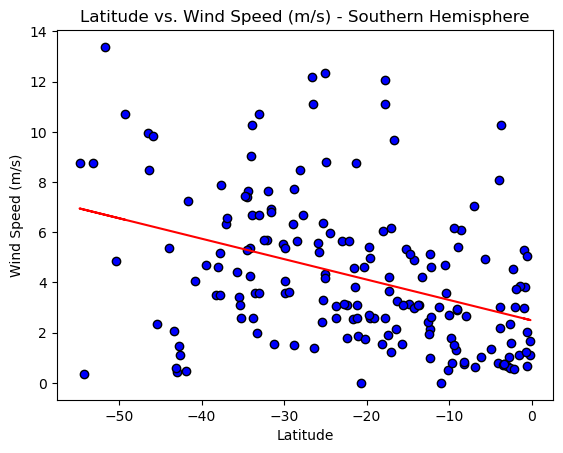

In [99]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed({date})")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
linreg_func(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 
The scatterplots shown available indicate a weak or nonexistent correlation between latitude and wind speed. Both hemispheres exhibit low r-values, and the dispersion of scatter points underscores that the data is too widely spread to establish a reliable correlation between latitude and wind speed.